In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import plotly.plotly as py
import plotly.graph_objs as go
from pprint import pprint
%matplotlib inline
import math

Single Core performance accross k-mer range 8...31 for This Method, Simka and Jellyfish

Text(0,0.5,u'Execution time (sec)')

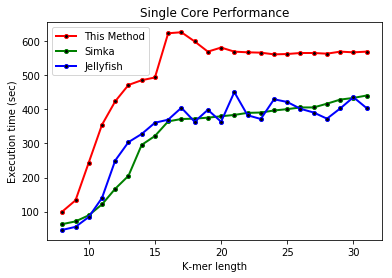

In [2]:
kmer_range = range(8, 32)

serial_1core_kmer_ranges = [100,133,244,355,424,472,486,494,624,627,600,570,
                            582,570,568,567,562,563,566,566,564,570,568,570]

simka_1core_kmer_ranges = [63,71,89,121,167,205,296,322,365,372,373,376,
                           380,384,390,391,397,401,406,406,417,429,434,441]

jellyfish_1core_kmer_ranges = [46,55,84,140,250,304,328,361,370,405,364,399,
                               364,451,383,372,430,422,402,391,373,403,436,404]

df = pd.DataFrame({'x': kmer_range, 'this_method': serial_1core_kmer_ranges, 
                   'simka': simka_1core_kmer_ranges, 
                   'jellyfish': jellyfish_1core_kmer_ranges })

plt.plot( 'x', 'this_method', data=df, marker='o', markerfacecolor='black', markersize=4,
         color='red', linewidth=2, label="This Method")
plt.plot( 'x', 'simka', data=df, marker='o', markerfacecolor='black', markersize=4,
         color='green', linewidth=2, label="Simka")
plt.plot( 'x', 'jellyfish', data=df, marker='o', markerfacecolor='black', markersize=4, 
         color='blue', linewidth=2, label="Jellyfish")
plt.legend()
plt.title("Single Core Performance")
plt.xlabel('K-mer length')
plt.ylabel('Execution time (sec)')

OpenMP Nested Parallel Exploration - Serial Time 627 sec

1. Parallelize FASTA files only (32 threads) - 403 sec (S = 1.55)
2. Parallelize Contigs Only (32 threads) - 550 sec (S = 1.14)
3. Parallelize Contigs (6 threads) and Contig Blocks (6 threads) - 415 sec (S = 1.51)
4. Parallelize FASTA files (6 threads) and Contigs (6 threads) - 215 sec (S = 2.91)
5. Parallelize FASTA files (24 threads) and Contigs (6 threads) - 203 sec (S = 3.088)
6. Parallelize FASTA files (10 threads) and Contigs (min(6, num_contigs) threads) - 114 sec (S = 5.5)
7. Parallelize FASTA files (20 threads) and Contigs (min(6, num_contigs) threads) - 167 sec (S = 3.75)
8. Parallelize FASTA files (10 threads) and Contigs (min(4, num_contigs) threads) - 113 sec (S = 5.54)
9. Parallelize FASTA files (20 threads) and Contigs (min(4, num_contigs) threads) - 166 sec (S = 3.77)
10. Parallelize FASTA files (30 threads) and Contigs (min(4, num_contigs) threads) - 249 sec (S = 2.51)


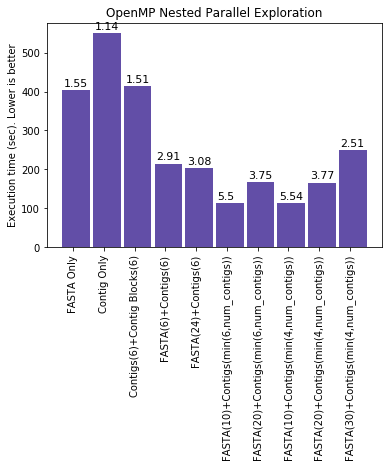

In [9]:
# Create bars
barWidth = 0.9
bars = [403, 550, 415, 215, 203, 114, 167, 113, 166, 249]
 
# The X position of bars
r = range(1,11)
 
# Create barplot
plt.bar(r, bars, width = barWidth, color = ('#624ea7'))
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°

plt.xticks([r1 + barWidth for r1 in range(len(r))], ['FASTA Only', 'Contig Only', 'Contigs(6)+Contig Blocks(6)',
                                                    'FASTA(6)+Contigs(6)', 'FASTA(24)+Contigs(6)',
                                                    'FASTA(10)+Contigs(min(6,num_contigs))',
                                                    'FASTA(20)+Contigs(min(6,num_contigs))',
                                                    'FASTA(10)+Contigs(min(4,num_contigs))',
                                                    'FASTA(20)+Contigs(min(4,num_contigs))',
                                                    'FASTA(30)+Contigs(min(4,num_contigs))'], rotation=90)


# Create labels
label = ['1.55', '1.14', '1.51', '2.91', '3.08', '5.5', '3.75',
        '5.54', '3.77', '2.51']
 
# Text on the top of each barplot
for i in range(len(r)):
    plt.text(x = r[i]-0.4 , y = bars[i]+10, s = label[i], size = 11)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)

plt.ylabel('Execution time (sec). Lower is better')
# Show graphic
plt.title("OpenMP Nested Parallel Exploration")
plt.show()


OpenMP Load Balanced (Contig Chunked) Exploration:
1. Parallelize Contig Blocks (25 threads) (Computation only) - 45 sec (S = 13.9)
2. Parallelize Contig Blocks (25 threads) (Computation + Merge Hashes 1D vector - False sharing possible) - 172 sec (S = 3.64)
3. Parallelize Contig Blocks (25 threads) (Computation + Merge Hashes 2D vector - False sharing reduced) - 175 sec (S = 3.58)

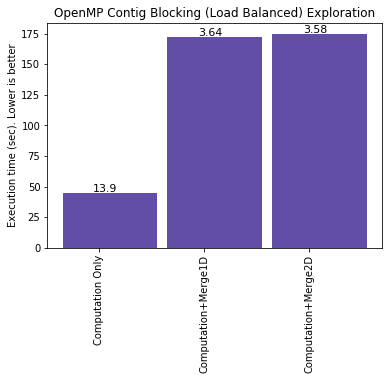

In [4]:
# Create bars
barWidth = 0.9
bars = [45, 172, 175]

# The X position of bars
r = range(1,4)
 
# Create barplot
plt.bar(r, bars, width = barWidth, color = ('#624ea7'))
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°

plt.xticks([r1 + barWidth for r1 in range(len(r))], ['Computation Only', 'Computation+Merge1D',
                                                     'Computation+Merge2D'], rotation=90)


# Create labels
label = ['13.9', '3.64', '3.58']
 
# Text on the top of each barplot
for i in range(len(r)):
    plt.text(x = r[i]-0.16, y = bars[i]+1, s = label[i], size = 11)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)

plt.ylabel('Execution time (sec). Lower is better')

# Show graphic
plt.title("OpenMP Contig Blocking (Load Balanced) Exploration")
plt.show()

OpenMP Nested + Load Balanced Exploration:
1. Parallelize FASTA files (4 threads, (static) and Contig Blocks (8 threads) - 643 sec 
(S = 0.97)
2. Parallelize FASTA files (4 threads, (dynamic, 1)) and Contig Blocks (8 threads) - 577 sec (S = 1.08)
3. Parallelize FASTA files (20 threads, (static) and Contig Blocks (8 threads) - 305 sec  
(S = 2.05)
4. Parallelize FASTA files (20 threads, (dynamic, 1)) and Contig Blocks (8 threads) - 288 sec (S = 2.17)

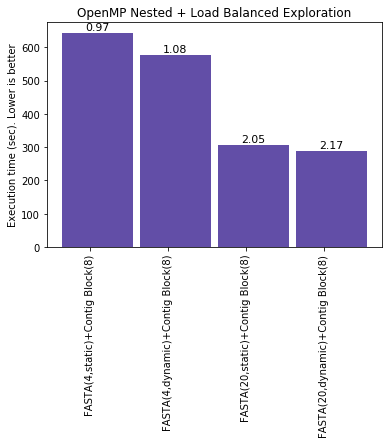

In [5]:
# Create bars
barWidth = 0.9
bars = [643, 577, 305, 288]

# The X position of bars
r = range(1,5)
 
# Create barplot
plt.bar(r, bars, width = barWidth, color = ('#624ea7'))
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°

plt.xticks([r1 + barWidth for r1 in range(len(r))], ['FASTA(4,static)+Contig Block(8)',
                                                     'FASTA(4,dynamic)+Contig Block(8)',
                                                     'FASTA(20,static)+Contig Block(8)',
                                                     'FASTA(20,dynamic)+Contig Block(8)'], rotation=90)


# Create labels
label = ['0.97', '1.08', '2.05', '2.17']
 
# Text on the top of each barplot
for i in range(len(r)):
    plt.text(x = r[i]-0.16, y = bars[i]+10, s = label[i], size = 11)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)

plt.ylabel('Execution time (sec). Lower is better')

# Show graphic
plt.title("OpenMP Nested + Load Balanced Exploration")
plt.show()

OpenMP Nested Parallelism - FASTA (Level 1) + Contigs (Level 2):  

1-40 threads in Level 1, 4 threads in Level 2  
17mer  
Justification from initial exploration  


Text(0,0.5,u'Execution time (sec)')

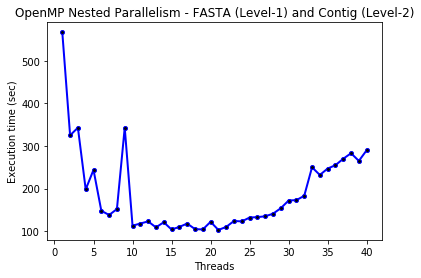

In [6]:
kmer_range = range(1, 41)

nested_fasta_contig = [567,325,343,198,244,148,138,152,343,113,118,123,109,121,
                       104,110,118,105,104,122,103,110,124,123,132,133,135,141,
                       154,172,173,183,250,232,247,255,270,283,265,290]

df = pd.DataFrame({'x': kmer_range, 'this_method': nested_fasta_contig})

plt.plot( 'x', 'this_method', data=df, marker='o', markerfacecolor='black', markersize=4,
         color='blue', linewidth=2)

plt.title("OpenMP Nested Parallelism - FASTA (Level-1) and Contig (Level-2)")
plt.xlabel('Threads')
plt.ylabel('Execution time (sec)')

OpenMP Chunked Parallelism - Contig Blocking:  

1-40 threads  
17mer  
Justification from initial exploration

Text(0,0.5,u'Execution time (sec)')

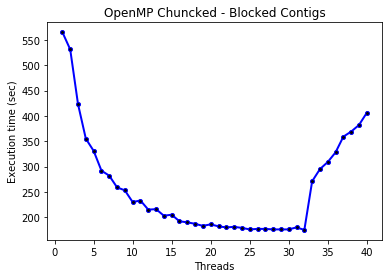

In [7]:
kmer_range = range(1, 41)

chuncked = [565,531,423,355,331,292,282,259,253,230,233,215,216,203,
            205,192,190,187,183,186,182,180,181,179,176,177,177,176,
            176,176,180,175,271,295,309,328,359,369,382,406]

df = pd.DataFrame({'x': kmer_range, 'this_method': chuncked})

plt.plot( 'x', 'this_method', data=df, marker='o', markerfacecolor='black', markersize=4,
         color='blue', linewidth=2)

plt.title("OpenMP Chuncked - Blocked Contigs")
plt.xlabel('Threads')
plt.ylabel('Execution time (sec)')

Strong Scaling Characteristics:  
1. OpenMP Chunked Parallelism - Contig Blocking (Compute Only)
2. Jellyfish
3. SIMKA

Text(0,0.5,u'Execution time (sec)')

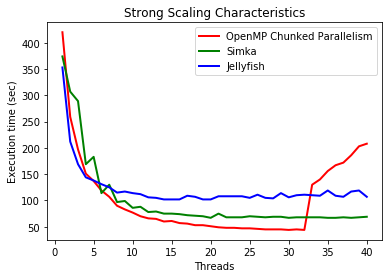

In [8]:
kmer_range = range(1,41)

openmp_chuncked_compute = [420,259,197,151,137,119,107,90,83,77,70,66,65,60,61,57,56,53,
                           53,51,49,48,48,47,47,46,45,45,45,44,45,44,130,140,156,167,172,186,203,208]

jellyfish = [353,212,169,144,138,131,125,115,117,114,112,106,105,102,102,102,109,107,102,
             102,108,108,108,108,105,111,105,104,114,106,110,111,110,109,119,109,107,117,119,107]

simka = [374,307,289,169,183,114,130,97,99,86,88,78,79,75,75,74,72,71,70,67,75,68,68,
         68,70,69,68,69,69,67,68,68,68,68,67,67,68,67,68,69]

df = pd.DataFrame({'x': kmer_range, 'this_method': openmp_chuncked_compute, 
                   'simka': simka, 
                   'jellyfish': jellyfish })

plt.plot( 'x', 'this_method', data=df,
         color='red', linewidth=2, label="OpenMP Chunked Parallelism")
plt.plot( 'x', 'simka', data=df,
         color='green', linewidth=2, label="Simka")
plt.plot( 'x', 'jellyfish', data=df, 
         color='blue', linewidth=2, label="Jellyfish")
plt.legend()
plt.title("Strong Scaling Characteristics")
plt.xlabel('Threads')
plt.ylabel('Execution time (sec)')